<a href="https://colab.research.google.com/github/eboo111/my/blob/main/ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# preprocessing  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# Read the dataset
%matplotlib inline
data=pd.read_csv('/content/Heart_Disease.csv')

In [ ]:
data.isnull().sum()

id                         0
Age                        6
Gender                     6
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  9
smoking_status             6
Heart Disease              0
dtype: int64

# Null Values

In [ ]:
data['smoking_status'].fillna('never smoked',inplace=True)#mode
data['work_type'].fillna('Private',inplace=True)#mode
data['Gender'].fillna('Female',inplace=True)#mode
data.fillna(value=data['Age'].mean(),inplace=True)

In [ ]:
 data.isnull().sum()

id                         0
Age                        0
Gender                     0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
work_type                  0
smoking_status             0
Heart Disease              0
dtype: int64


# Convert categorical to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical columns to numerical using LabelEncoder
cat_cols = ['Gender','work_type', 'smoking_status','Heart Disease']
for col in cat_cols:
    data[col] = LabelEncoder().fit_transform(data[col])
data

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
0,1,70.0,0,4,130,322,0,2,109,0,2.4,2,3,3,2,1,1
1,2,67.0,1,3,115,564,0,2,160,0,1.6,2,0,7,3,2,0
2,3,57.0,0,2,124,261,0,0,141,0,0.3,1,0,7,2,2,1
3,4,64.0,0,4,128,263,0,0,105,1,0.2,2,1,7,2,3,0
4,5,74.0,1,2,120,269,0,2,121,1,0.2,1,1,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,266,52.0,0,3,172,199,1,0,162,0,0.5,1,0,7,2,3,0
266,267,44.0,0,2,120,263,0,0,173,0,0.0,1,0,7,2,2,0
267,268,56.0,1,2,140,294,0,2,153,0,1.3,2,0,3,0,3,0
268,269,57.0,0,4,140,192,0,0,148,0,0.4,2,0,6,3,3,0


# outlier

<Axes: >

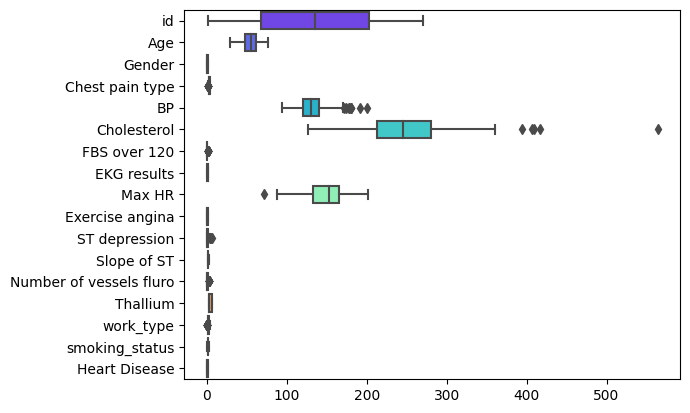

In [ ]:
sns.boxplot(data,palette="rainbow",orient='h')

In [ ]:

def remove_outliers(data):
    # Loop through all columns in the dataset
    for column in data.columns:
        # Only apply outlier detection to columns with more than 2 unique values
        if data[column].nunique() > 2:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lowerlimit = Q1 - (1.5 * IQR)
            upperlimit = Q3 + (1.5 * IQR)
            # Replace outlier valueswith NaN
            data.loc[(data[column] < lowerlimit) | (data[column] > upperlimit), column] = np.nan
    # Drop rows with NaN values
    data.dropna(inplace=True)
    return data

In [ ]:
for i in data.columns:
   if data[i].nunique()>2:
    remove_outliers(data)

<Axes: >

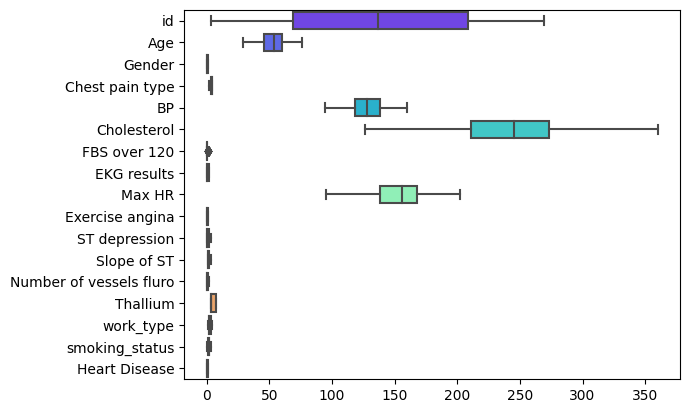

In [ ]:
sns.boxplot(data,palette="rainbow",orient='h')

# **normalization**

In [ ]:
# Normalize the numeric columns using tandardScaler ****we donot normalize the categorical
from sklearn.preprocessing import  StandardScaler
# select a subset of numerical columns to normalize
num_cols = [ 'id','Age', 'Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR' ,'Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']

# Normalize the numeric columns using standardScaler
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])
print(data)

# Save the preprocessed dataset as a new file
data.to_csv('Heart_Disease.csv', index=False)

           id       Age  Gender  Chest pain type        BP  Cholesterol  \
2   -1.674506  0.415620       0        -1.816553 -0.185912     0.334144   
3   -1.662007  1.198080       0         0.890183  0.091657     0.378888   
4   -1.649507  2.315880       1        -1.816553 -0.463480     0.513119   
5   -1.637007  1.309860       0         0.890183 -0.463480    -1.545100   
6   -1.624507  0.303840       0        -0.463185  0.230441     0.222284   
..        ...       ...     ...              ...       ...          ...   
262  1.575444  0.527400       0        -1.816553 -0.463480     0.848699   
263  1.587944  0.127702       0        -1.816553  0.230441     0.446003   
264  1.600443 -0.590400       0        -1.816553 -1.157402    -0.381759   
266  1.625443 -1.037520       0        -1.816553 -0.463480     0.378888   
268  1.650443  0.415620       0         0.890183  0.924363    -1.209521   

     FBS over 120  EKG results    Max HR  Exercise angina  ST depression  \
2       -0.365148    -0

<Axes: >

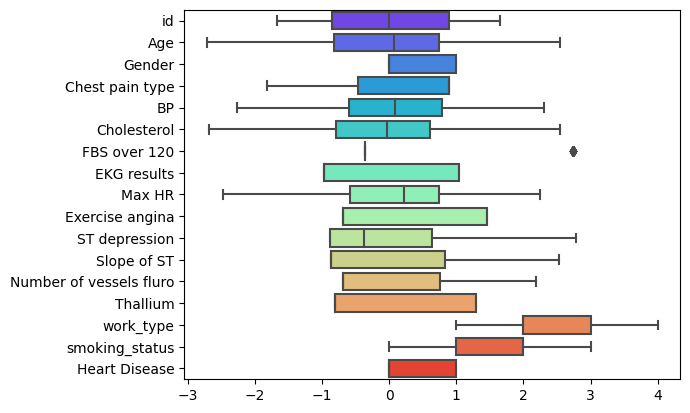

In [ ]:
sns.boxplot(data,palette="rainbow",orient='h')

# Feature selection and Extraction

## Data correlation

In [ ]:
data_corr=data.corr()
data_corr

,id,Age,Gender,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,work_type,smoking_status,Heart Disease
id,1.000000,-0.018750,-0.029169,-0.071793,0.036202,0.148491,-0.127214,-0.018255,0.025900,-0.068984,0.159632,0.071408,-0.028387,0.034540,0.097862,-0.046644,0.051324
Age,-0.018750,1.000000,0.082607,0.135414,0.242001,0.144643,0.047867,0.082751,-0.381585,0.139694,0.196726,0.122575,0.349736,0.062926,0.051891,-0.061143,0.130840
Gender,-0.029169,0.082607,1.000000,-0.143159,0.000743,0.152458,-0.033615,-0.047411,0.105154,-0.220145,-0.157973,-0.116821,-0.050910,-0.425569,-0.048998,-0.060636,-0.310834
Chest pain type,-0.071793,0.135414,-0.143159,1.000000,0.036930,0.013745,-0.169131,0.174639,-0.351188,0.379304,0.319424,0.251992,0.234308,0.333001,-0.006699,0.037279,0.465380
BP,0.036202,0.242001,0.000743,0.036930,1.000000,0.146036,0.091056,0.083044,0.013379,0.020073,0.204360,0.010394,0.006692,0.086384,0.025968,-0.078896,0.106846
Cholesterol,0.148491,0.144643,0.152458,0.013745,0.146036,1.000000,-0.049167,0.128347,0.005119,0.092558,-0.035184,-0.071389,0.169654,-0.035334,0.076191,0.060888,0.115967
FBS over 120,-0.127214,0.047867,-0.033615,-0.169131,0.091056,-0.049167,1.000000,0.078357,0.009546,0.033464,-0.040178,0.051440,0.012621,-0.024054,-0.135202,-0.010810,-0.069433
EKG results,-0.018255,0.082751,-0.047411,0.174639,0.083044,0.128347,0.078357,1.000000,-0.087601,0.114064,0.163256,0.155441,0.075943,-0.044409,0.050653,0.027951,0.190439
Max HR,0.025900,-0.381585,0.105154,-0.351188,0.013379,0.005119,0.009546,-0.087601,1.000000,-0.445810,-0.447335,-0.433152,-0.264824,-0.318451,-0.004884,0.117528,-0.407883
Exercise angina,-0.068984,0.139694,-0.220145,0.379304,0.020073,0.092558,0.033464,0.114064,-0.445810,1.000000,0.353154,0.302148,0.237663,0.353788,0.061504,0.060365,0.449104


Text(0.5, 1.0, 'correlation')

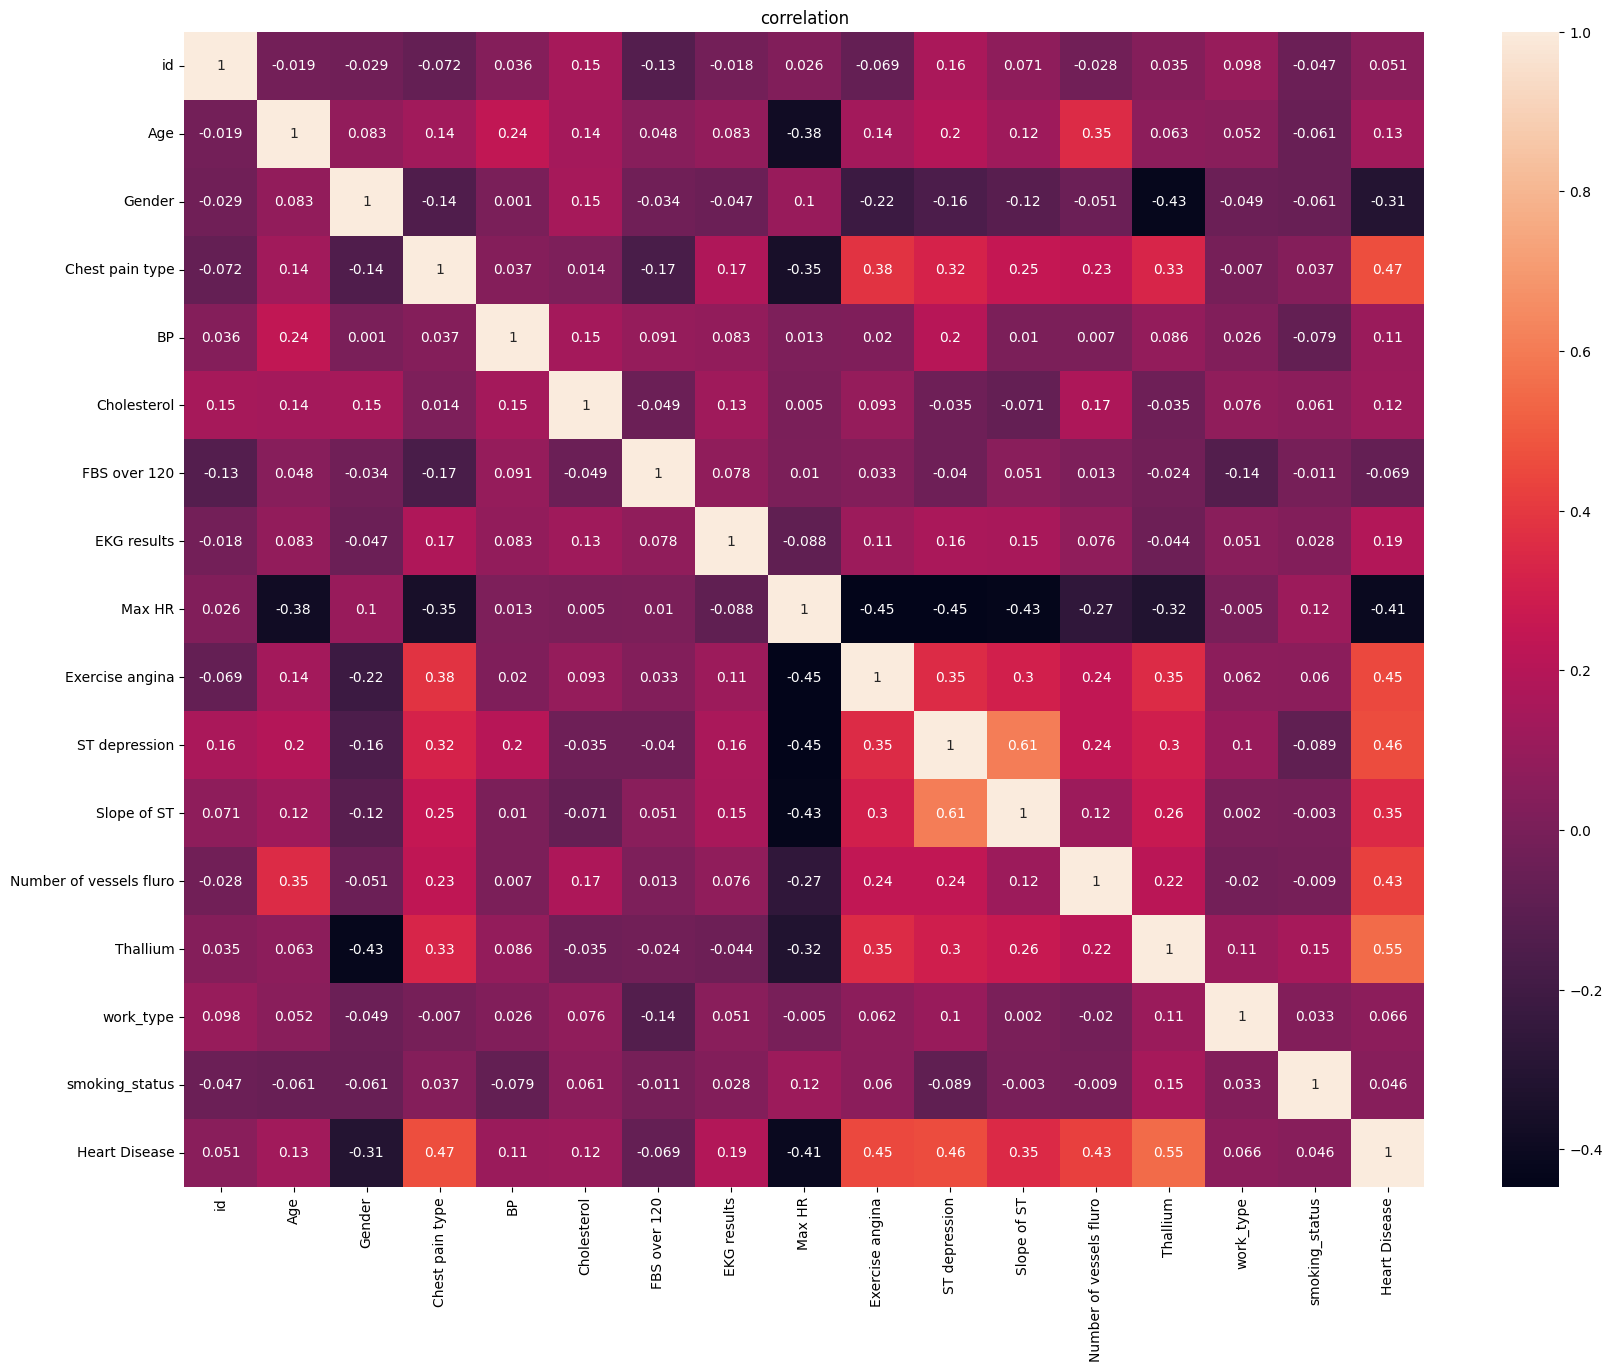

In [ ]:
#Heatmap
plt.figure(figsize=(20,15))
plot=sns.heatmap(data_corr.round(3),annot=True)
plot.set_title("correlation")

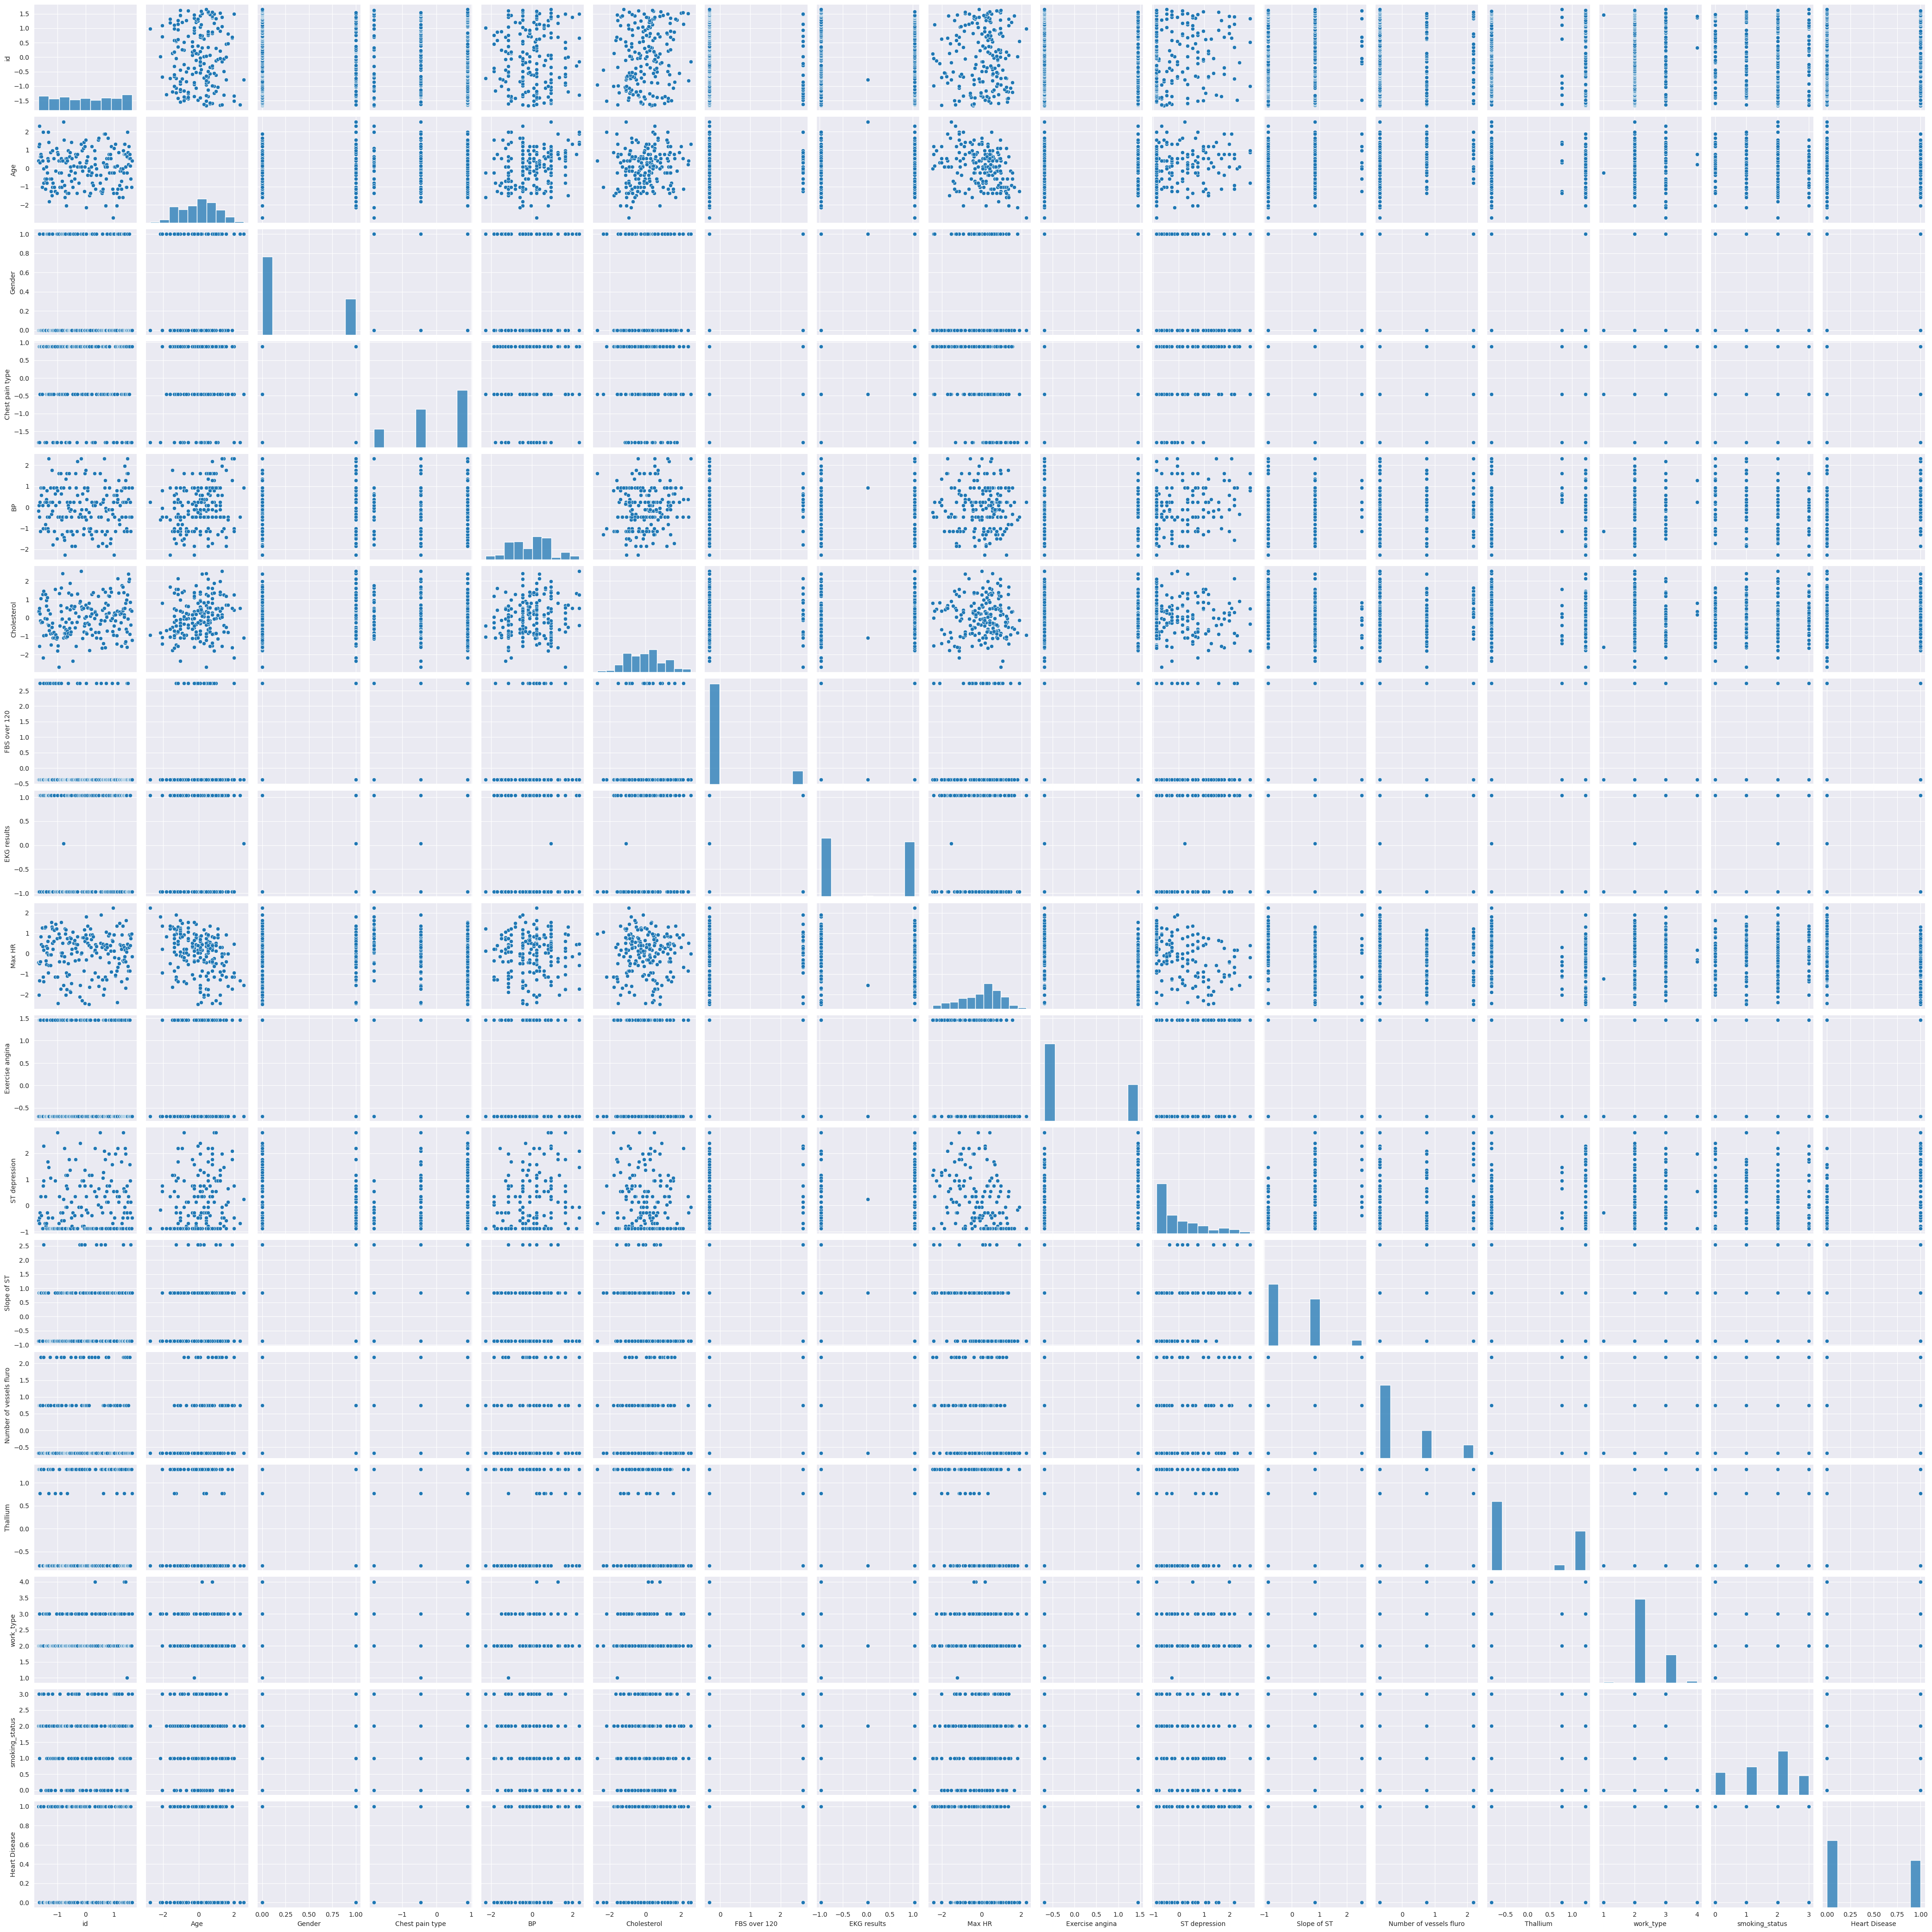

In [ ]:
#Pairplot
sns.set_style('darkgrid')
g=sns.pairplot(data)

## Feature Selection using filter mehtod


In [ ]:
#using filter method
from sklearn.feature_selection import SelectKBest, f_classif

# separate the features and target variable
X = data.drop(columns=['Heart Disease'])
y = data['Heart Disease']

# select the top 10 features using the f_classif test
selector = SelectKBest(f_classif, k=10)
X_new = selector.fit_transform(X, y)

# print the names of the selected features
feature_names = X.columns[selector.get_support()]
print(feature_names)

Index(['Age', 'Gender', 'Chest pain type', 'EKG results', 'Max HR',
       'Exercise angina', 'ST depression', 'Slope of ST',
       'Number of vessels fluro', 'Thallium'],
      dtype='object')


## LogisticRegression model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(columns=['Heart Disease'])
y = data['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#create a logistic regression model
model = LogisticRegression()

# fit the model to the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_test = model.predict(X_test)
# evaluate the accuracy of the test model
accuracy = accuracy_score(y_test, y_pred_test)
print(f"test Accuracy : {accuracy}")

y_pred_train = model.predict(X_train)
# evaluate the accuracy of the train model
accuracy = accuracy_score(y_train, y_pred_train)
print(f"train Accuracy : {accuracy}")



test Accuracy : 0.8947368421052632
train Accuracy : 0.8389261744966443


## SVM model

In [ ]:
from sklearn.svm import SVC

# create a support vector machine model
svc_model = SVC(kernel='linear')

# fit the model to the training data
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test )
print(f"test Accuracy: {accuracy}")

# Make predictions on the train set
y_pred_train = svc_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"train Accuracy: {accuracy}")


test Accuracy: 0.868421052631579
train Accuracy: 0.8523489932885906


## Decision Tree model

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_model = DecisionTreeClassifier(max_depth=3)

# fit the model to the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = tree_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test )
print(f"test Accuracy: {accuracy}")

# Make predictions on the train set
y_pred_train = tree_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"train Accuracy: {accuracy}")


test Accuracy: 0.8947368421052632
train Accuracy: 0.8791946308724832


# Make Classification Models

## Random Forest Model

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# separate the features and target variable
X = data.drop(columns=['Heart Disease'])
y = data['Heart Disease']

# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=40)

# create a random forest classifier with hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=2)

# train the model on the training data
rf_model.fit(X_train, y_train)

y_pred_test = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test )
print(f"test Accuracy: {accuracy}")

y_pred_train = rf_model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred_train)
print(f"train Accuracy: {accuracy}")

test Accuracy: 0.9473684210526315
train Accuracy: 0.9395973154362416


## confusion matrix

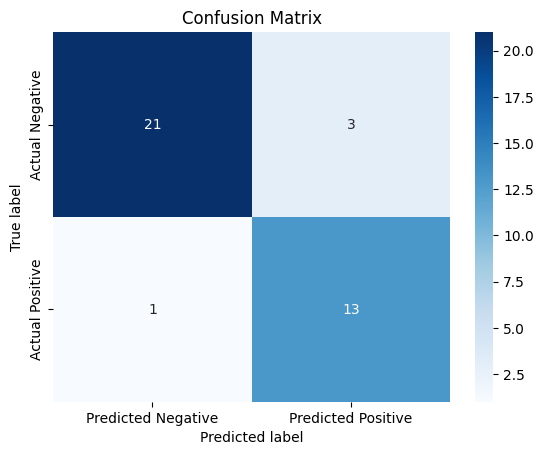

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# separate the features and target variable
X = data.drop(columns=['Heart Disease'])
y = data['Heart Disease']

#split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# create a logistic regression classifier
cm_model = LogisticRegression()

# train the model on the training data
cm_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = cm_model.predict(X_test)

# calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# visualize the confusion matrix
conf_matrix = pd.DataFrame({"Predicted Negative": [tn, fn], "Predicted Positive": [fp, tp]}, index=["Actual Negative", "Actual Positive"])
sns.heatmap(conf_matrix, annot=True, cmap="Blues")

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()



## classification report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# separate the features and target variable
X = data.drop(columns=['Heart Disease'])
y = data['Heart Disease']

# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# create a logistic regression classifier
classification_model = LogisticRegression()

# train the model on the training data
classification_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_test = classification_model.predict(X_test)
report = classification_report(y_test, y_pred_test)
print("test",report)

# make predictions on the training data
y_pred_train = classification_model.predict(X_train)
report = classification_report(y_train, y_pred_train)
print("train",report)

test               precision    recall  f1-score   support

           0       0.95      0.88      0.91        24
           1       0.81      0.93      0.87        14

    accuracy                           0.89        38
   macro avg       0.88      0.90      0.89        38
weighted avg       0.90      0.89      0.90        38

train               precision    recall  f1-score   support

           0       0.85      0.87      0.86        86
           1       0.82      0.79      0.81        63

    accuracy                           0.84       149
   macro avg       0.84      0.83      0.83       149
weighted avg       0.84      0.84      0.84       149



## mean square error

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# separate the features and target variable
X = data.drop(columns=['Heart Disease'])
y = data['Heart Disease']

# split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=9)

# create a linear regression model
mse_model = LinearRegression()

# train the model on the training data
mse_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred_test = mse_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_test)
print(f"test MSE: {mse}")

# make predictions on the training data
y_pred_train = mse_model.predict(X_train)
mse = mean_squared_error(y_train , y_pred_train)
print(f"train MSE: {mse}")

test MSE: 0.09312423812241517
train MSE: 0.11650269003197415
